# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how = "right", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
combined_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [3]:
# Checking the number of mice.
#total_mice = mouse_metadata["Mouse ID"].count()
total_mice = combined_df["Mouse ID"].nunique()
total_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_id = combined_df[combined_df.duplicated()]["Mouse ID"]
duplicate_mouse_id

137    g989
Name: Mouse ID, dtype: object

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = combined_df[combined_df["Mouse ID"].str.contains('g989')]
duplicate_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [62]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_df[~(combined_df.duplicated(subset="Mouse ID", keep=False) & combined_df["Mouse ID"].eq("g989"))].copy() #note .copy() is to remove errors 
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [63]:
# Checking the number of mice in the clean DataFrame.
total_mice_clean = clean_df["Mouse ID"].nunique()
total_mice_clean

248

## Summary Statistics

In [64]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

In [65]:
mean_tumor_volume = clean_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
mean_tumor_volume

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [66]:
median_tumor_volume = clean_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
median_tumor_volume

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [67]:
tumor_volume_variance = clean_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_volume_variance

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [68]:
tumor_volume_stddev = clean_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_volume_stddev

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [69]:
tumor_volume_sem = clean_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]
tumor_volume_sem

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [70]:
###### NOTE: Calculations shown above^^ ####

# Assemble the resulting (groupby) series into a single summary DataFrame.
summary_df = pd.DataFrame({
    "Mean Tumor Volume":mean_tumor_volume,
    "Median Tumor Volume":median_tumor_volume,
    "Tumor Volume Variance":tumor_volume_variance,
    "Tumor Volume Std. Dev.":tumor_volume_stddev,
    "Tumor Volume Std. Err.":tumor_volume_sem
})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [118]:
# Using the aggregation method, produce the same summary statistics in a single line.
summary_stats_agg = clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg(['mean','median','std.var','np.std','stderr'])

AttributeError: 'SeriesGroupBy' object has no attribute 'std.var'

## Bar and Pie Charts

In [71]:
#for reference
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [72]:
mice_tested_per_drug = clean_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
mice_tested_per_drug

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [73]:
drug_regimens = clean_df["Drug Regimen"].unique()
drug_regimens.sort() #needed in order to get the correct axis entries for pyplot
drug_regimens

array(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol',
       'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype=object)

Text(0, 0.5, 'Number of Mice Tested')

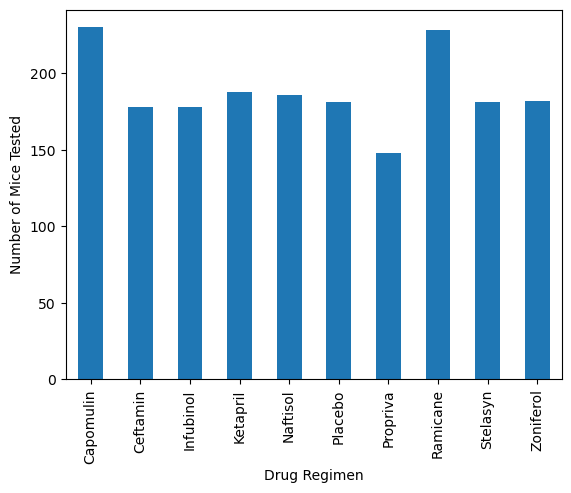

In [74]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
panda_plot = mice_tested_per_drug.plot.bar()
panda_plot.set_xlabel("Drug Regimen")
panda_plot.set_ylabel("Number of Mice Tested")

Text(0, 0.5, 'Number of Mice Tested')

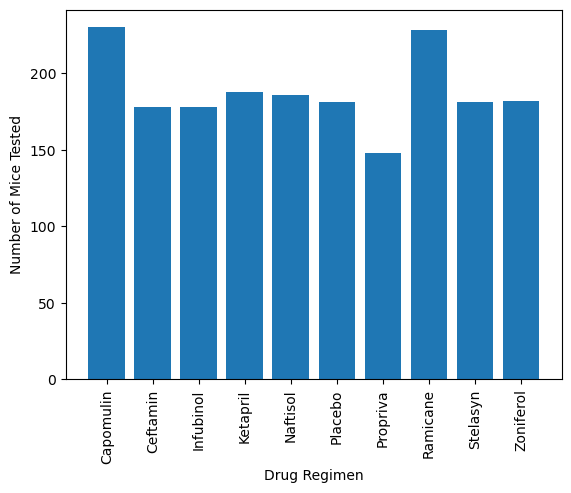

In [75]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
## pyplot bar chart ##
x_axis = np.arange(len(mice_tested_per_drug))
plt.bar(x_axis, mice_tested_per_drug, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drug_regimens , rotation=90)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

In [76]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_df["Sex"]
plot_data = sex_df.value_counts("Male")
plot_data

Male      0.509574
Female    0.490426
Name: Sex, dtype: float64

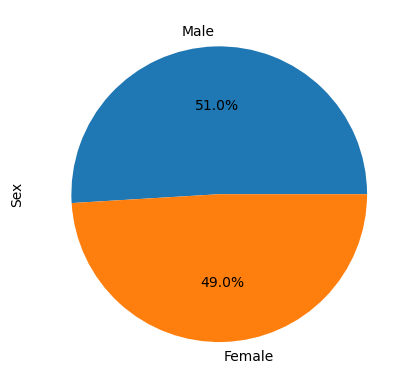

In [77]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_pie_plot = plot_data.plot.pie(autopct='%1.1f%%')

Text(0, 0.5, 'Sex')

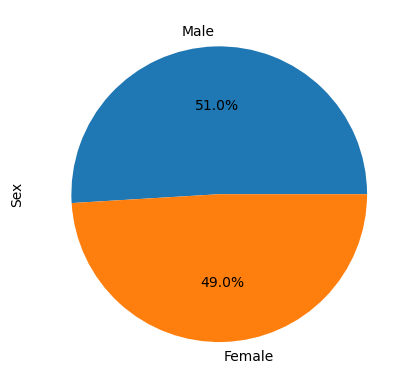

In [78]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
plt.pie(plot_data, labels=labels, autopct='%1.1f%%')
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [79]:
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.000000,0
1,f932,Ketapril,Male,15,29,0,45.000000,0
2,g107,Ketapril,Female,2,29,0,45.000000,0
3,a457,Ketapril,Female,11,30,0,45.000000,0
4,c819,Ketapril,Male,21,25,0,45.000000,0
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [80]:
last_timepoints = clean_df[(clean_df["Timepoint"] == 45)]
last_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1763,n364,Ramicane,Male,4,17,45,31.095335,1
1764,b128,Capomulin,Female,9,22,45,38.982878,2
1765,l661,Ceftamin,Male,18,26,45,59.851956,3
1766,y865,Ceftamin,Male,23,26,45,64.729837,3
1767,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [81]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_timepoints = clean_df[(clean_df["Timepoint"] == 45)]
final_timepoints

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1763,n364,Ramicane,Male,4,17,45,31.095335,1
1764,b128,Capomulin,Female,9,22,45,38.982878,2
1765,l661,Ceftamin,Male,18,26,45,59.851956,3
1766,y865,Ceftamin,Male,23,26,45,64.729837,3
1767,y769,Ceftamin,Female,6,27,45,68.594745,4
...,...,...,...,...,...,...,...,...
1888,r944,Capomulin,Male,12,25,45,41.581521,2
1889,u364,Capomulin,Male,18,17,45,31.023923,3
1890,p438,Ceftamin,Female,11,26,45,61.433892,1
1891,x773,Placebo,Female,21,30,45,58.634971,4


In [82]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
###NOTE TO GRADER: it is not clear what is meant by "merge this group df with the original dataframe..."  --> do they mean clean_df? or combined_df?
###this section is wrong - will follow up with tutor
clean_final = pd.merge(clean_df, final_timepoints, how="left", on=["Mouse ID", "Mouse ID"])
clean_final

,Mouse ID,Drug Regimen_x,Sex_x,Age_months_x,Weight (g)_x,Timepoint_x,Tumor Volume (mm3)_x,Metastatic Sites_x,Drug Regimen_y,Sex_y,Age_months_y,Weight (g)_y,Timepoint_y,Tumor Volume (mm3)_y,Metastatic Sites_y
0,b128,Capomulin,Female,9,22,0,45.000000,0,Capomulin,Female,9.0,22.0,45.0,38.982878,2.0
1,f932,Ketapril,Male,15,29,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,g107,Ketapril,Female,2,29,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,a457,Ketapril,Female,11,30,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,c819,Ketapril,Male,21,25,0,45.000000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1875,r944,Capomulin,Male,12,25,45,41.581521,2,Capomulin,Male,12.0,25.0,45.0,41.581521,2.0
1876,u364,Capomulin,Male,18,17,45,31.023923,3,Capomulin,Male,18.0,17.0,45.0,31.023923,3.0
1877,p438,Ceftamin,Female,11,26,45,61.433892,1,Ceftamin,Female,11.0,26.0,45.0,61.433892,1.0
1878,x773,Placebo,Female,21,30,45,58.634971,4,Placebo,Female,21.0,30.0,45.0,58.634971,4.0


In [83]:
#capomulin final tumor volumes
capomulin_final = final_timepoints[final_timepoints["Drug Regimen"] == "Capomulin"]
capomulin_volume = capomulin_final["Tumor Volume (mm3)"]
capomulin_volume

1764    38.982878
1769    34.455298
1771    41.483008
1777    37.074024
1788    32.377357
1791    40.159220
1797    31.896238
1800    33.329098
1817    38.846876
1821    40.658124
1829    38.939633
1838    36.041047
1843    28.430964
1846    28.484033
1849    23.343598
1850    37.311846
1854    40.728578
1859    38.125164
1878    47.685963
1888    41.581521
1889    31.023923
Name: Tumor Volume (mm3), dtype: float64

In [84]:
#ramicane final tumor volumes
ramicane_final = final_timepoints[final_timepoints["Drug Regimen"] == "Ramicane"]
ramicane_volume = ramicane_final["Tumor Volume (mm3)"]
ramicane_volume

1763    31.095335
1773    38.407618
1776    45.220869
1780    36.374510
1795    30.276232
1799    30.638696
1801    40.659006
1808    30.564625
1814    22.050126
1822    33.397653
1828    36.134852
1833    31.560470
1836    43.047543
1844    37.311236
1857    38.810366
1867    40.667713
1870    29.128472
1874    37.225650
1879    32.978522
1885    33.562402
Name: Tumor Volume (mm3), dtype: float64

In [85]:
#infubinol final tumor volumes
infubinol_final = final_timepoints[final_timepoints["Drug Regimen"] == "Infubinol"]
infubinol_volume = infubinol_final["Tumor Volume (mm3)"]
infubinol_volume

1779    67.685569
1781    72.226731
1784    62.754451
1786    65.525743
1789    66.196912
1794    66.083066
1802    62.435404
1804    67.973419
1806    60.918767
Name: Tumor Volume (mm3), dtype: float64

In [86]:
#ceftamin final tumor volumes
ceftamin_final = final_timepoints[final_timepoints["Drug Regimen"] == "Ceftamin"]
ceftamin_volume = ceftamin_final["Tumor Volume (mm3)"]
ceftamin_volume

1765    59.851956
1766    64.729837
1767    68.594745
1772    61.849023
1790    67.527482
1810    67.748662
1855    64.634949
1856    62.999356
1858    68.923185
1862    61.386660
1864    64.299830
1872    59.741901
1890    61.433892
Name: Tumor Volume (mm3), dtype: float64

In [119]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
treatments

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_quartiles = capomulin_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[.25]
capomulin_upperq = capomulin_quartiles[.75]
capomulin_iqr = capomulin_upperq - capomulin_lowerq
capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

ramicane_quartiles = ramicane_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[.25]
ramicane_upperq = ramicane_quartiles[.75]
ramicane_iqr = ramicane_upperq - ramicane_lowerq
ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

infubinol_quartiles = infubinol_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[.25]
infubinol_upperq = infubinol_quartiles[.75]
infubinol_iqr = infubinol_upperq - infubinol_lowerq
infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

ceftamin_quartiles = ceftamin_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[.25]
ceftamin_upperq = ceftamin_quartiles[.75]
ceftamin_iqr = ceftamin_upperq - ceftamin_lowerq
ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Capomulin IQR:{capomulin_iqr}")
print(f"Capomulin Lower Bound:{capomulin_lower_bound}")
print(f"Capomulin Upper Bound:{capomulin_upper_bound}")
print(f"Ramicane IQR:{ramicane_iqr}")
print(f"Ramicane Lower Bound:{ramicane_lower_bound}")
print(f"Ramicane Upper Bound:{ramicane_upper_bound}")
print(f"Infubinol IQR:{infubinol_iqr}")
print(f"Infubinol Lower Bound:{infubinol_lower_bound}")
print(f"Infubinol Upper Bound:{infubinol_upper_bound}")
print(f"Ceftamin IQR:{ceftamin_iqr}")
print(f"Ceftamin Lower Bound:{ceftamin_lower_bound}")
print(f"Ceftamin Upper Bound:{ceftamin_upper_bound}")
#######################################################
#
##Note, these results don't exactly match the solution, (i assume) since the merged dataframe wasn't done correctly. I will follow up with a tutor this week, ending here for now and will update with plots
#
#######################################################


    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

Capomulin IQR:7.781863460000004
Capomulin Lower Bound:20.70456164999999
Capomulin Upper Bound:51.83201549
Ramicane IQR:7.527130082500001
Ramicane Lower Bound:19.69048010125
Ramicane Upper Bound:49.79900043125001
Infubinol IQR:4.9311172099999965
Infubinol Lower Bound:55.35777559500001
Infubinol Upper Bound:75.08224443499999
Ceftamin IQR:6.093590140000003
Ceftamin Lower Bound:52.29350701999999
Ceftamin Upper Bound:76.66786758


In [98]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.



## Line and Scatter Plots

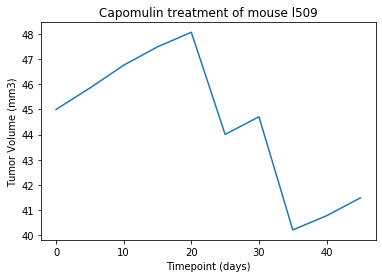

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin



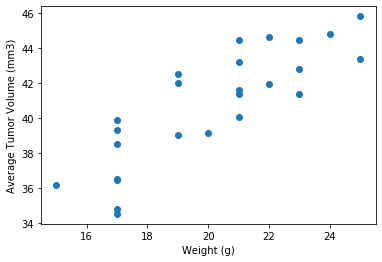

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen



## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


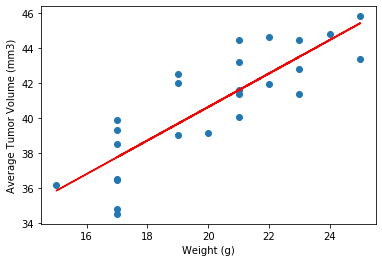

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

